# test sound augmentation functions

In [2]:
%load_ext autoreload
%autoreload 2

import os
import librosa
import matplotlib.pyplot as plt
from model.sound_augmenter import transform_signal_add_SNR_noise, transform_signal_pitch_shift


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'code.config'; 'code' is not a package

/var/folders/59/__mg86nn4hx9y9ck3zxxr7680000gn/T/ipykernel_51010/2375732743.py:24: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  signal_db = librosa.amplitude_to_db(signal_stft)


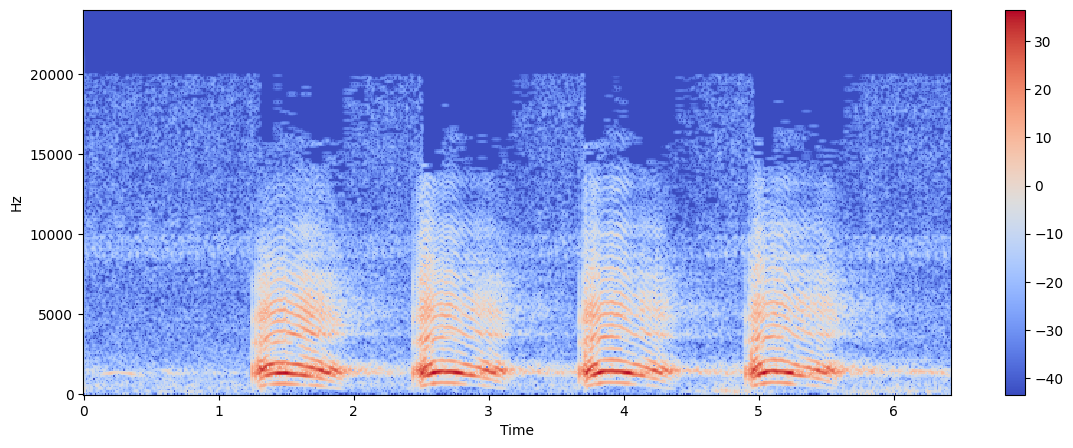

In [2]:
SOUND_DIR = '../raw_data/train_audio/'
SOUND_DIR_FILE= os.path.join(SOUND_DIR,'amecro/XC126022.mp3')
SAMPLING_RATE = 48000
DURATION_IN_SECONDS = 5
READING_OFFSET = 0
STFT_NUMBER_SAMPLES = 512


# Load the mp3 file
#def load_sound_file():

signal,simpling_rate = librosa.load(SOUND_DIR_FILE,
                                     offset = READING_OFFSET,
                                     duration=DURATION_IN_SECONDS,
                                     sr=SAMPLING_RATE,
                                     mono=True) # sr = sampling rate


signal_stft = librosa.stft(signal,
                           n_fft=STFT_NUMBER_SAMPLES)



signal_db = librosa.amplitude_to_db(signal_stft)

plt.figure(figsize=(14, 5))
librosa.display.specshow(signal_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz')
plt.colorbar()


In [3]:
augmented_sound = transform_signal_add_SNR_noise(signal, sample_rate=SAMPLING_RATE)

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14, 5))
augmented_sound_stft = librosa.stft(augmented_sound,
                                    n_fft=STFT_NUMBER_SAMPLES)

augmented_sound_db = librosa.amplitude_to_db(augmented_sound_stft)
librosa.display.specshow(signal_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[0])
librosa.display.specshow(augmented_sound_db, sr=SAMPLING_RATE, x_axis='time', y_axis='hz', ax=ax[1])


NameError: name 'transform_signal_add_SNR_noise' is not defined